# Recurrent Neural Networks vs Random Forest

In [18]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from keras.models import load_model

from core.random_forest import load_data as load_data_rf
from core.generate_sequences import generate_sequences
from core.rnn import create_model, load_data as load_data_rnn, train as train_rnn

LABELS_4 = ["walking", "stairs_down", "stairs_up", "other"]
LABELS_6 = ["walking", "stairs_down", "stairs_up", "sitting", "standing", "laying"]

## Random Forest

In [20]:
def train_random_forest(train_path, test_path):
    x_train, y_train = load_data_rf(train_path)
    x_test, y_test = load_data_rf(test_path)
    
    x_train = x_train.reshape(len(x_train), -1)
    x_test = x_test.reshape(len(x_test), -1)
    
    clf = RandomForestClassifier()
    
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    return score

### 6 Labels (walking, stairs_down, stairs_up, sitting, standing, laying)

In [21]:
rf_6_accuracy = train_random_forest("../data/uci_train_6_labels.csv", "../data/uci_test_6_labels.csv")

print(f"Test Accuracy: {rf_6_accuracy}")

Test Accuracy: 0.7543264336613505


### 4 Labels (walking, stairs_down, stairs_up, other)

In [22]:
rf_4_accuracy = train_random_forest("../data/uci_train_4_labels.csv", "../data/uci_test_4_labels.csv")

print(f"Test Accuracy: {rf_4_accuracy}")

Test Accuracy: 0.8306752629793009


## Recurrent Neural Network

### 6 Labels (walking, stairs_down, stairs_up, sitting, standing, laying)

In [23]:
rnn_model_6 = load_model("../models/uci6-128.h5")

x_test, y_test = load_data_rnn("../data/uci_test_6_labels.csv", 128, LABELS_6)

[_, rnn_6_accuracy] = rnn_model_6.evaluate(x_test, y_test, 512)

print(f"Test Accuracy: {rnn_6_accuracy}")

2947/2947 [==============================] - 1s 222us/step
Test Accuracy: 0.9056667796142391


### 4 Labels (walking, stairs_down, stairs_up, other)

In [24]:
rnn_model_4 = load_model("../models/uci4-128.h5")

x_test, y_test = load_data_rnn("../data/uci_test_4_labels.csv", 128, LABELS_4)

[_, rnn_4_accuracy] = rnn_model_4.evaluate(x_test, y_test, 512)

print(f"Test Accuracy: {rnn_4_accuracy}")

2947/2947 [==============================] - 1s 220us/step
Test Accuracy: 0.9545300297305104


## Conclusions

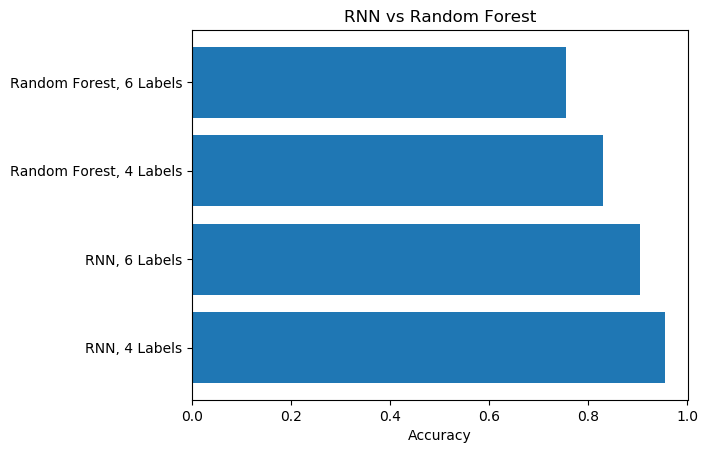

In [31]:
fig, ax = plt.subplots()

models = ('Random Forest, 6 Labels', 'Random Forest, 4 Labels', 'RNN, 6 Labels', 'RNN, 4 Labels')
y_pos = np.arange(len(models))
performance = np.array([rf_6_accuracy, rf_4_accuracy, rnn_6_accuracy, rnn_4_accuracy])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('RNN vs Random Forest')

plt.show()